**Introdução Geral**



### 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from skimage import io

In [2]:
class getCsv:
    
    def __init__(self):
        self.url_list = ['https://raw.githubusercontent.com/carolinasimao/PDS/master/peace.csv', 
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/human.csv', 
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/income.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/precipitation.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/pollution.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/tourism_receipts.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/area.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/business.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/population.csv',
                         'https://raw.githubusercontent.com/carolinasimao/PDS/master/travel.csv'
                        ]
        self.names_index = ["peace", "human_development", "income", "precipitation", "pollution", "tourism_receipts",
                             "area", "population", "travel"]
        self.df = []
        
    def downloadCsv(self):
       
        for i in self.url_list:
            if i=='https://raw.githubusercontent.com/carolinasimao/PDS/master/income.csv':
                self.df.append(pd.read_csv(i, index_col=[2,0], quotechar = '"', header = 0, delimiter = ";",
                                         skiprows=1,
                                         names=["Country Code","Region","IncomeGroup","SpecialNotes","Country Name"],
                                         usecols=["Country Code","Country Name","IncomeGroup"]))
            else:
                if i=='https://raw.githubusercontent.com/carolinasimao/PDS/master/human.csv':
                    self.df.append(pd.read_csv(i, index_col=[0,1], quotechar = '"', header = 0, delimiter = ";",
                                              skiprows=1,
                                              names=["indicatorID","indicatorLabel","Country Code", "Country Name", "Year", "Value"],
                                              usecols=["Country Code", "Country Name", "Year", "Value"])) 
                
                else:
                    self.df.append(pd.read_csv(i, index_col=[0,1], quotechar = '"', header = 0, delimiter = ";",
                                          usecols=["Country Code","Country Name","2010","2011","2012","2013","2014","2015","2016","2017"]))
            
        #self.data_raw = dic(zip(self.df,self.names_index))
    
    #def moldaCsv
    
data = getCsv()
data.downloadCsv()

In [2]:
df_peace = data.df[0].dropna(how="all", axis = [0,1]).loc[:,::-1]
df_human_development = pd.pivot_table(data.df[1].dropna(how="all", axis = [0,1]),values='Value', index=['Country Name', 'Country Code'], columns=['Year']).iloc[:,2:]
df_income = data.df[2].dropna(how="all", axis = [0,1])
df_precipitation = data.df[3].dropna(how="all", axis = [0,1])
df_pollution = data.df[4].dropna(how="all", axis = [0,1])
df_tourism_receipts = data.df[5].dropna(how="all", axis = [0,1])
df_area = data.df[6].dropna(how="all", axis = [0,1])
df_business = data.df[7].dropna(how="all", axis = [0,1])
df_population = data.df[8].dropna(how="all", axis = [0,1])
df_travel = data.df[9].dropna(how="all", axis = [0,1])

C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  
C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  after removing the cwd from sys.path.
C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: supplying multiple axes to axis is deprecated and will be remo

**MEDIAS**

Average Peace Index : 2.09
Average Precipitation : 1119.62
Average Tourism Receipts : 15.88
Average Pollution : 29.98
Average Number of Days to Start a Business : 27.18
Average Human Development Index : 0.69


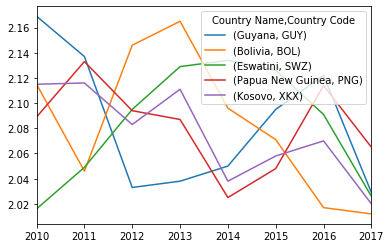

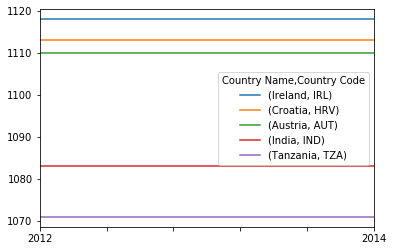

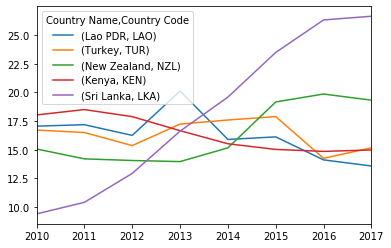

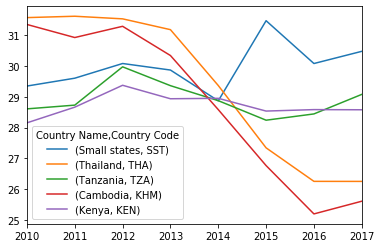

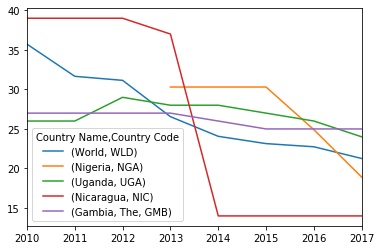

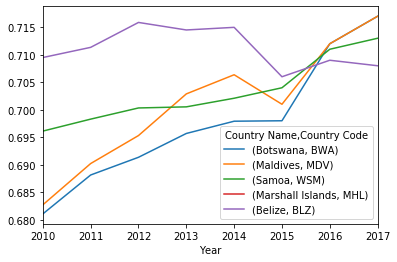

In [3]:
data1={0:df_peace, 1:df_precipitation, 2:df_tourism_receipts, 3:df_pollution, 4:df_business, 5:df_human_development}
names=['Peace Index','Precipitation','Tourism Receipts','Pollution','Number of Days to Start a Business',
          'Human Development Index']
data1_abov={2:df_tourism_receipts, 5:df_human_development}
data1_below={0:df_peace, 1:df_precipitation, 3:df_pollution, 4:df_business}

for i in data1:
    data1[i]['av_year']=data1[i].mean(axis=1)
    print("Average", names[i], ":", round(data1[i]['av_year'].mean(),2))
    
    if i in data1_abov:
        data1[i]=data1[i][data1[i].av_year>=round(data1[i]['av_year'].mean(),2)]
        data1[i]=data1[i].sort_values(by='av_year', ascending=True).drop(columns='av_year')
        
    if i in data1_below:
        data1[i]=data1[i][data1[i].av_year<=round(data1[i]['av_year'].mean(),2)]
        data1[i]=data1[i].sort_values(by='av_year', ascending=False).drop(columns='av_year')
        
    data1[i].head().T.plot.line()

In [4]:
df_peace = data1[0]
df_precipitation = data1[1]
df_tourism_receipts = data1[2]
df_pollution = data1[3]
df_business = data1[4]
df_human_development = data1[5]

**PEACE INDEX**

In [5]:
df_peace

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Guyana,GUY,2.169,2.137,2.033,2.038,2.050,2.095,2.122,2.029
Bolivia,BOL,2.115,2.046,2.146,2.165,2.096,2.071,2.017,2.012
Eswatini,SWZ,2.016,2.049,2.095,2.129,2.134,2.126,2.091,2.026
Papua New Guinea,PNG,2.089,2.133,2.094,2.087,2.025,2.048,2.114,2.065
Kosovo,XKX,2.115,2.116,2.083,2.111,2.038,2.058,2.070,2.020
Cuba,CUB,2.062,2.037,2.078,2.064,2.084,2.079,2.072,2.063
Angola,AGO,2.020,2.074,2.105,2.094,2.115,2.008,2.073,2.007
Nepal,NPL,2.138,2.207,2.110,2.057,1.981,1.885,2.003,2.048
North Macedonia,MKD,2.014,1.962,1.997,2.081,2.066,2.041,2.118,2.129


**Check the difference between the countries that had the best index peace in 2010 and in 2017**

In [6]:
df_peace_best_year10 = df_peace.sort_values(by=['2010'], ascending=True)
pd.DataFrame(df_peace_best_year10)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Iceland,ISL,1.143,1.099,1.159,1.164,1.160,1.142,1.138,1.084
New Zealand,NZL,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216
Japan,JPN,1.328,1.333,1.346,1.309,1.330,1.315,1.374,1.377
Denmark,DNK,1.334,1.290,1.235,1.197,1.179,1.179,1.201,1.299
Austria,AUT,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292
Slovenia,SVN,1.387,1.388,1.438,1.434,1.430,1.421,1.390,1.373
Sweden,SWE,1.390,1.409,1.409,1.399,1.375,1.383,1.420,1.489
Australia,AUS,1.393,1.447,1.497,1.451,1.387,1.367,1.400,1.387
Norway,NOR,1.407,1.482,1.563,1.530,1.556,1.483,1.488,1.504


In [7]:
df_range_best_year17 = df_peace.sort_values(by=['2017'], ascending=True)
pd.DataFrame(df_range_best_year17)

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Iceland,ISL,1.143,1.099,1.159,1.164,1.160,1.142,1.138,1.084
New Zealand,NZL,1.251,1.255,1.276,1.291,1.271,1.263,1.238,1.216
Portugal,PRT,1.472,1.485,1.520,1.525,1.466,1.418,1.324,1.273
Austria,AUT,1.383,1.416,1.407,1.309,1.287,1.264,1.249,1.292
Denmark,DNK,1.334,1.290,1.235,1.197,1.179,1.179,1.201,1.299
Canada,CAN,1.500,1.460,1.438,1.342,1.325,1.337,1.337,1.332
Switzerland,CHE,1.464,1.383,1.435,1.421,1.424,1.443,1.369,1.368
Czech Republic,CZE,1.452,1.426,1.400,1.383,1.382,1.372,1.367,1.369
Slovenia,SVN,1.387,1.388,1.438,1.434,1.430,1.421,1.390,1.373


**Graph representing the countries with the best index peace in 2017**

In [8]:
#!pip install folium #apply if needed
import folium
 
b = folium.Map(
    location=[40.033265, -7.8896263],
    zoom_start=2,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[64.9841821, -18.1059013],
    popup='Iceland',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[-41.5000831, 172.8344077],
    popup='New Zealand',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[40.033265, -7.8896263],
    popup='Portugal',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[47.2000338, 13.199959],
    popup='Austria',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

folium.Marker(
    location=[55.670249, 10.3333283],
    popup='Denmark',
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(b)

b

**HUMAN DEVELOPMENT INDEX**

In [9]:
df_human_development

,Year,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Botswana,BWA,0.681066,0.688141,0.691360,0.695690,0.697919,0.698,0.712,0.717
Maldives,MDV,0.682715,0.690221,0.695311,0.702883,0.706365,0.701,0.712,0.717
Samoa,WSM,0.696122,0.698297,0.700328,0.700528,0.702094,0.704,0.711,0.713
Marshall Islands,MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708
Belize,BLZ,0.709494,0.711344,0.715874,0.714505,0.714982,0.706,0.709,0.708
Suriname,SUR,0.707432,0.709001,0.710913,0.712771,0.714286,0.725,0.719,0.720
Dominican Republic,DOM,0.700954,0.704323,0.707893,0.710733,0.715028,0.722,0.733,0.736
Saint Vincent and the Grenadines,VCT,0.711363,0.712801,0.715145,0.717367,0.720035,0.722,0.721,0.723
Tonga,TON,0.712920,0.715961,0.716523,0.715560,0.717041,0.721,0.724,0.726


**Get the order of columns by descending order**

In [10]:
df_human_development_desc = df_human_development.sort_values(by=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], ascending=False)
df_human_development_desc

,Year,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Norway,NOR,0.939844,0.940697,0.942293,0.942322,0.943877,0.949,0.951,0.953
Australia,AUS,0.927410,0.929656,0.932190,0.933389,0.934958,0.939,0.938,0.939
Switzerland,CHE,0.924370,0.924559,0.926960,0.928312,0.929613,0.939,0.943,0.944
Netherlands,NLD,0.909236,0.919071,0.920454,0.920442,0.921794,0.924,0.928,0.931
United States of America,USA,0.908582,0.911121,0.911534,0.913140,0.914959,0.920,0.922,0.924
Denmark,DNK,0.908388,0.920488,0.921084,0.922809,0.923328,0.925,0.928,0.929
Ireland,IRL,0.908000,0.908905,0.909851,0.912306,0.915542,0.923,0.934,0.938
Germany,DEU,0.906467,0.910604,0.914763,0.915162,0.916080,0.926,0.934,0.936
United Kingdom,GBR,0.906006,0.901455,0.901390,0.902098,0.906698,0.910,0.920,0.922


**Get the Top 5 countrys**

In [11]:
df_human_development_desc_top5 = df_human_development_desc.head()
df_human_development_desc_top5

,Year,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Norway,NOR,0.939844,0.940697,0.942293,0.942322,0.943877,0.949,0.951,0.953
Australia,AUS,0.927410,0.929656,0.932190,0.933389,0.934958,0.939,0.938,0.939
Switzerland,CHE,0.924370,0.924559,0.926960,0.928312,0.929613,0.939,0.943,0.944
Netherlands,NLD,0.909236,0.919071,0.920454,0.920442,0.921794,0.924,0.928,0.931
United States of America,USA,0.908582,0.911121,0.911534,0.913140,0.914959,0.920,0.922,0.924


**Get the graphic**

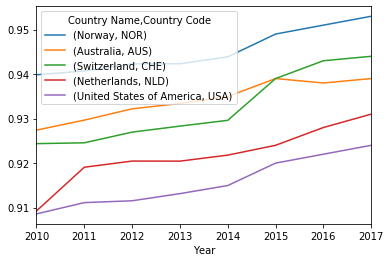

In [12]:
import matplotlib.pyplot as plt
import numpy as np

df_human_development_desc_top5_graph=df_human_development_desc_top5.T # transposta da tabela 
df_human_development_desc_top5_graph.plot.line()

**INCOME**

In [13]:
df_income

,,IncomeGroup
Country Name,Country Code,
Afghanistan,AFG,Low income
Angola,AGO,Lower middle income
Albania,ALB,Upper middle income
Andorra,AND,High income
United Arab Emirates,ARE,High income
Argentina,ARG,Upper middle income
Armenia,ARM,Upper middle income
American Samoa,ASM,Upper middle income
Antigua and Barbuda,ATG,High income


**Get the High income**

In [14]:
df_high_income=df_income[df_income['IncomeGroup'] == 'High income']
df_high_income

,,IncomeGroup
Country Name,Country Code,
Andorra,AND,High income
United Arab Emirates,ARE,High income
Antigua and Barbuda,ATG,High income
Australia,AUS,High income
Austria,AUT,High income
Belgium,BEL,High income
Bahrain,BHR,High income
"Bahamas, The",BHS,High income
Bermuda,BMU,High income


**Get the graphic**

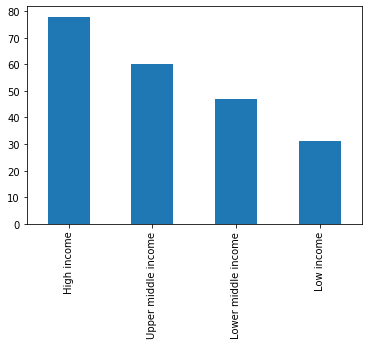

In [15]:
df_income['IncomeGroup'].value_counts().plot('bar')

**BUSINESS**

In [16]:
df_business

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
World,WLD,35.728488,31.656322,31.144382,26.550265,24.065079,23.144211,22.743684,21.259474
Nigeria,NGA,NaN,NaN,NaN,30.300000,30.300000,30.300000,24.900000,18.900000
Uganda,UGA,26.000000,26.000000,29.000000,28.000000,28.000000,27.000000,26.000000,24.000000
Nicaragua,NIC,39.000000,39.000000,39.000000,37.000000,14.000000,14.000000,14.000000,14.000000
"Gambia, The",GMB,27.000000,27.000000,27.000000,27.000000,26.000000,25.000000,25.000000,25.000000
Middle East & North Africa (excluding high income),MNA,25.625000,25.541667,27.884615,26.153846,25.384615,26.000000,26.115385,25.423077
San Marino,SMR,NaN,NaN,41.000000,41.000000,36.000000,12.500000,12.500000,12.500000
Guinea,GIN,40.000000,40.000000,43.000000,23.000000,15.000000,15.000000,15.000000,15.000000
Bhutan,BTN,46.000000,35.000000,35.000000,30.000000,15.000000,15.000000,15.000000,12.000000


**PRECIPITATION**

In [17]:
df_precipitation

,,2012,2014
Country Name,Country Code,,
Ireland,IRL,1118.0,1118.0
Croatia,HRV,1113.0,1113.0
Austria,AUT,1110.0,1110.0
India,IND,1083.0,1083.0
Tanzania,TZA,1071.0,1071.0
"Korea, Dem. People’s Rep.",PRK,1054.0,1054.0
Benin,BEN,1039.0,1039.0
Mozambique,MOZ,1032.0,1032.0
Antigua and Barbuda,ATG,1030.0,1030.0


**TOURISM RECEIPTS**

In [18]:
df_tourism_receipts

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Lao PDR,LAO,17.055027,17.182409,16.248954,20.117974,15.897429,16.120504,14.115181,13.583984
Turkey,TUR,16.715678,16.499864,15.359463,17.235435,17.591716,17.887041,14.251514,15.165142
New Zealand,NZL,15.066311,14.203822,14.062028,13.965211,15.162226,19.165120,19.854826,19.321099
Kenya,KEN,18.033931,18.499550,17.884201,16.660230,15.520572,15.027605,14.855382,14.981130
Sri Lanka,LKA,9.405397,10.415827,12.937027,16.618772,19.587659,23.478498,26.312689,26.634625
"Egypt, Arab Rep.",EGY,27.918626,19.835080,22.268952,15.061882,16.916739,18.358025,9.832175,20.142415
Portugal,PRT,18.111240,17.380556,17.635544,17.791478,18.871896,19.263542,20.480147,22.120777
Panama,PAN,12.749295,13.353099,14.746606,17.823606,20.330005,22.067876,25.554438,25.193308
Costa Rica,CRI,19.386275,18.787794,18.326388,20.049954,18.941310,19.876360,20.260349,19.596749


**POLLUTION**

In [19]:
df_pollution

,,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,Country Code,,,,,,,,
Small states,SST,29.347142,29.601827,30.077859,29.865959,28.868198,31.464942,30.077330,30.472246
Thailand,THA,31.565399,31.609629,31.525315,31.174724,29.364641,27.344567,26.258055,26.256727
Tanzania,TZA,28.607533,28.728769,29.969845,29.359633,28.873716,28.240449,28.443570,29.076641
Cambodia,KHM,31.343136,30.919624,31.283733,30.336530,28.583366,26.769239,25.202875,25.614292
Kenya,KEN,28.154771,28.662885,29.372280,28.935345,28.949350,28.536280,28.583377,28.578374
El Salvador,SLV,30.461941,33.628265,30.933974,30.759882,27.502591,26.474731,24.736486,24.472292
Zambia,ZMB,28.836379,28.987117,29.742040,29.112221,28.493252,28.375452,27.355674,27.438035
Lao PDR,LAO,31.731996,29.669660,30.297418,30.259489,28.390172,26.139489,25.801018,25.109538
Peru,PER,31.502574,31.571166,30.494456,29.743086,27.582673,26.037268,25.542746,24.786728


In [23]:
result = pd.concat([df_peace, df_human_development, df_business, df_precipitation, df_tourism_receipts, df_pollution, df_income], 
                   axis=1, sort=False).dropna()
result.iloc[:,-1:]

,,IncomeGroup
Country Name,Country Code,
Croatia,HRV,High income
Cyprus,CYP,High income
Greece,GRC,High income
Portugal,PRT,High income


CROATIA:


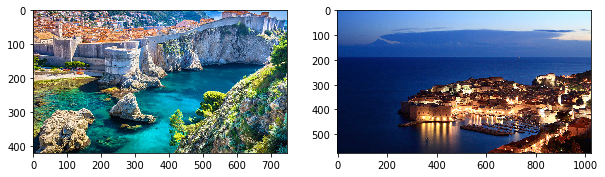

CYPRUS:


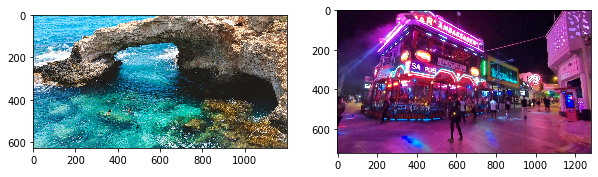

GREECE:


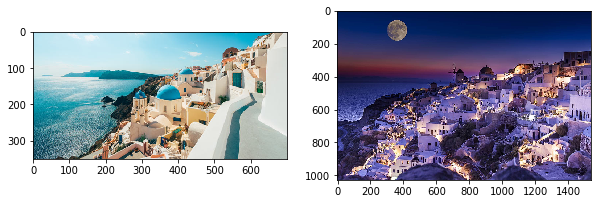

PORTUGAL:


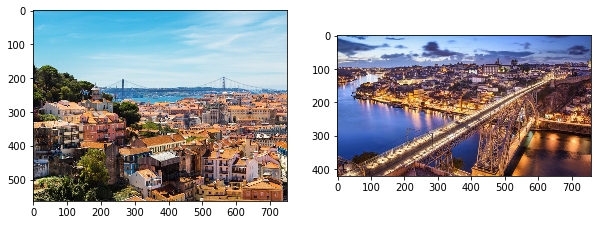

In [3]:
croatia1=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/croatia.jpg")
croatia2=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/croatia2.jpg")
cyprus1=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/cyprus.jpg")
cyprus2=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/cyprus2.jpg")
greece1=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/greece.jpg")
greece2=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/greece2.jpg")
portugal1=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/portugal.jpg")
portugal2=io.imread("https://raw.githubusercontent.com/carolinasimao/PDS/master/portugal2.jpg")


print('\033[1m'+"CROATIA:")
f=plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(croatia1)
f.add_subplot(1,2,2)
plt.imshow(croatia2)
plt.show()

print('\033[1m'+"CYPRUS:")
f=plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(cyprus1)
f.add_subplot(1,2,2)
plt.imshow(cyprus2)
plt.show()

print('\033[1m'+"GREECE:")
f=plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(greece1)
f.add_subplot(1,2,2)
plt.imshow(greece2)
plt.show()

print('\033[1m'+"PORTUGAL:")
f=plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(portugal1)
f.add_subplot(1,2,2)
plt.imshow(portugal2)
plt.show()

In [24]:
#url = 'https://raw.githubusercontent.com/carolinasimao/PDS/master/area.csv'

#df_area = pd.read_csv(url, index_col=0, quotechar = '"', header = 0, delimiter = ";",usecols = ['Country Name', 'Country Code', '2018'])
#df_area
df_area.drop(range(2,9), axis = 1)
df_area.drop([-1], axis = 1)

df_population.drop(range(2,9), axis = 1)
df_population.drop([-1], axis = 1)

df_area_population = df_population.merge(df_area, how = 'left')
df_area_population
density = np.array(df_area_population.iloc[:,2])/np.array(df_area_population.iloc[:,3])
density
pd.concat(df_area_population,density)

NameError: name 'df_area' is not defined